In [25]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras import regularizers
from datetime import datetime
import matplotlib.pyplot  as plt 
%matplotlib inline
from sklearn.metrics import classification_report
from keras.utils import plot_model

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to 4D tensors (batch size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(rate=0.001),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
#Computes the crossentropy loss between and predictions
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                        

In [ ]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to 4D tensors (batch size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(rate=0.001),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(rate=0.001),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
#Computes the crossentropy loss between and predictions
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to 4D tensors (batch size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])
#Todo налаштування
#regula

# Compile model
#Computes the crossentropy loss between and predictions
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [3]:
model_path=os.path.join('./data/simple-train-1.hdf5')
checkpointer = keras.callbacks.ModelCheckpoint(filepath=model_path, 
                               verbose=1, 
                               save_best_only=True)


start = datetime.now()
history = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpointer],
                    verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.1134 - accuracy: 0.9652
Epoch 1: val_loss improved from inf to 0.05625, saving model to ./data\simple-train-1.hdf5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1133 - accuracy: 0.9652 - val_loss: 0.0563 - val_accuracy: 0.9823
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0432 - accuracy: 0.9861
Epoch 2: val_loss improved from 0.05625 to 0.03000, saving model to ./data\simple-train-1.hdf5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9895
Epoch 3: val_loss did not improve from 0.03000
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - lo

In [6]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_score = model.evaluate(X_train, y_train, verbose=0)
    test_score = model.evaluate(X_test, y_test, verbose=0)
    return train_score, test_score

dotted_line = '-' * 38
# Compute scores
train_score, test_score = evaluate_model(model,x_train, y_train, x_test, y_test)
# Pint Train vs Test report
print('{:<10s}{:>14s}{:>14s}'.format("", "LOSS", "ACCURACY"))
print(dotted_line)
print('{:<10s}{:>14.4f}{:>14.4f}'.format( "Training:", train_score[0], 100 * train_score[1]))
print('{:<10s}{:>14.4f}{:>14.4f}'.format( "Test:", test_score[0], 100 * test_score[1]))

                    LOSS      ACCURACY
--------------------------------------
Training:         0.0052       99.8267
Test:             0.0433       99.1400


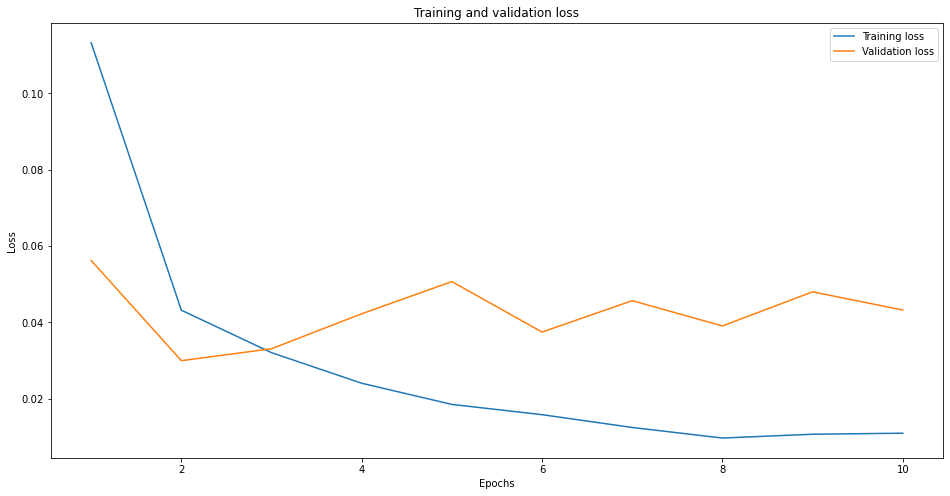

<Figure size 432x288 with 0 Axes>

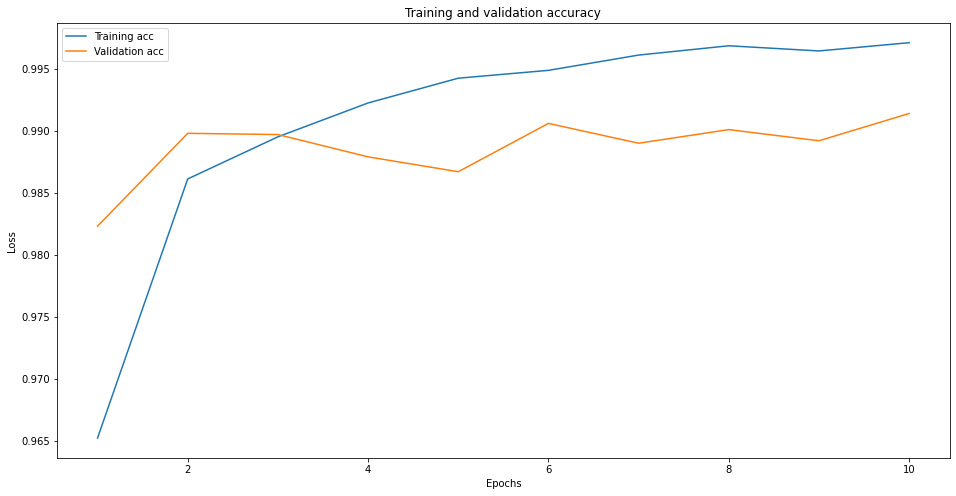

In [7]:
def plot_train_history(history,figsize=(16,8),first_line='#1f77b4',second_line='#ff7f0e'):
       loss = history.history['loss']
       val_loss = history.history['val_loss']
       epochs = range(1, len(loss) + 1)
       plt.figure(figsize=(16,8))
       plt.plot(epochs, loss, '#1f77b4', label='Training loss')
       plt.plot(epochs, val_loss, '#ff7f0e', label='Validation loss')
       plt.title('Training and validation loss')
       plt.xlabel('Epochs')
       plt.ylabel('Loss')
       plt.legend()
       plt.show()
       plt.clf()
       plt.figure(figsize=figsize)
       acc = history.history['accuracy']
       val_acc = history.history['val_accuracy']
       plt.plot(epochs, acc, '#1f77b4', label='Training acc')
       plt.plot(epochs, val_acc, '#ff7f0e', label='Validation acc')
       plt.title('Training and validation accuracy')
       plt.xlabel('Epochs')
       plt.ylabel('Loss')
       plt.legend()
       plt.show()

plot_train_history(history)

In [8]:
# Make predictions on test set
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to integers
y_test = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion matrix:\n', confusion_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion matrix:
 tf.Tensor(
[[ 975    0    0    0    0    0    3    1    1    0]
 [   1 1127    0    2    0    1    1    3    0    0]
 [   1    2 1023    0    1    0    1    3    1    0]
 [   1    0    0 1005    0    1    0    1    2    0]
 [   0    0    0    0  976    0    1    1    2    2]
 [   0    0    0    4    0  884    1    0    3    0]
 [   4    1    0    0    3    3  946    0    1    0]
 [   0    2    1    0    0    1    0 1020    1    3]
 [   1    0    0    0    1    1    0    0  970    1]
 [   0    0    0    0    6    5    0    2    8  988]], shape=(10, 10), dtype=int32)


In [12]:
import numpy as np
from datetime import datetime
import os
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reshape and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

inputs = Input(shape=(image_size, image_size, 1))
y = Conv2D(filters=64,kernel_size=3,activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=64,kernel_size=3,activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=64,kernel_size=3,activation='relu')(y)
y = Flatten()(y)
y = Dropout(0.3)(y)
outputs = Dense(num_labels, activation='softmax')(y)

model = Model(inputs=inputs, outputs=outputs) 
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_path=os.path.join('./data/simple-train-2.hdf5')
checkpointer = keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)

start = datetime.now()
history=model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=20, batch_size=128)
duration = datetime.now() - start
print("Training completed in time: ", duration)
score = model.evaluate(x_test,y_test,batch_size=128, verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          3692

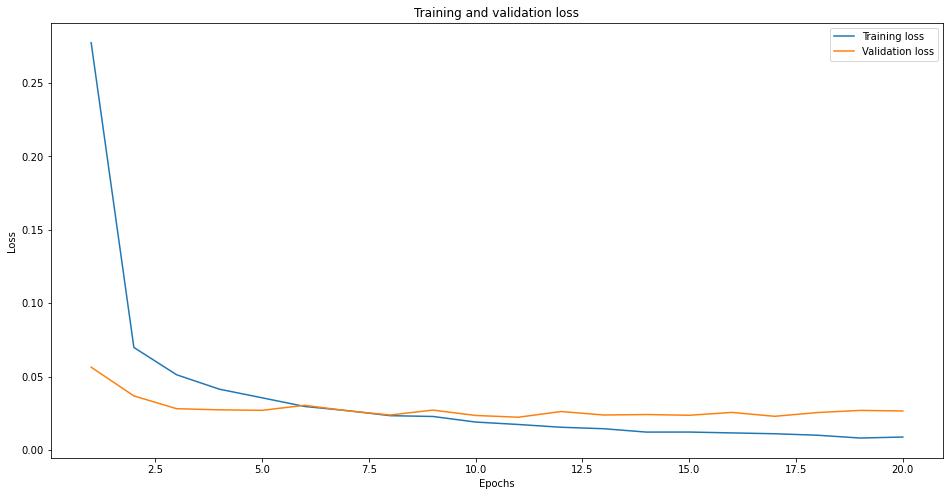

<Figure size 432x288 with 0 Axes>

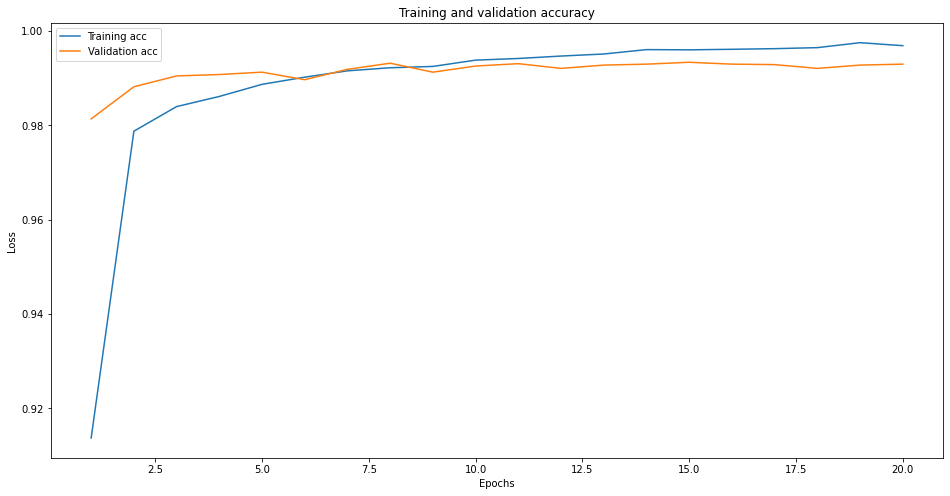

In [14]:
import matplotlib.pyplot  as plt 
def plot_train_history(history,figsize=(16,8),first_line='#1f77b4',second_line='#ff7f0e'):
       loss = history.history['loss']
       val_loss = history.history['val_loss']
       epochs = range(1, len(loss) + 1)
       plt.figure(figsize=(16,8))
       plt.plot(epochs, loss, '#1f77b4', label='Training loss')
       plt.plot(epochs, val_loss, '#ff7f0e', label='Validation loss')
       plt.title('Training and validation loss')
       plt.xlabel('Epochs')
       plt.ylabel('Loss')
       plt.legend()
       plt.show()
       plt.clf()
       plt.figure(figsize=figsize)
       acc = history.history['accuracy']
       val_acc = history.history['val_accuracy']
       plt.plot(epochs, acc, '#1f77b4', label='Training acc')
       plt.plot(epochs, val_acc, '#ff7f0e', label='Validation acc')
       plt.title('Training and validation accuracy')
       plt.xlabel('Epochs')
       plt.ylabel('Loss')
       plt.legend()
       plt.show()

plot_train_history(history)